# NHÓM 14 - FINAL PROJECT





## Data description

<<lời dẫn>>

📌 Các dữ liệu được cho:

* Date: YY/MM/DD
* Rented Bike count: Số lượng xe đạp được thuê mỗi giờ
* Hour: Giờ trong ngày
* Temperature: Nhiệt độ (đo theo thang Celsius)
* Humidity: độ ẩm (đo theo %)
* Windspeed: tốc độ gió (đo theo m/s)
* Visibility: tầm nhìn (đo theo 10m)
* Dew point temperature: nhiệt độ điểm sương (theo thang Celsius)
* Solar radiation: Bức xạ Mặt Trời (đo theo MJ/m2)
* Rainfall: lượng mưa (đo theo mm)
* Snowfall: lượng tuyết rơi (đo theo cm)
* Seasons: Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

📌 Nhiệm vụ: Tạo mô hình đơn giản dự báo số lượng xe đạp được thuê


## Tiền xử lý dữ liệu

### Import thư viện

In [ ]:
##import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")

### Import csv

In [ ]:
url = "https://raw.githubusercontent.com/linhtm61/GKI-TINH314/069b05b040e0850642687e8dfcbf2852981b37ba/SeoulBikeData.csv"
columns = ['Date','Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Seasons','Holiday','Functioning Day']
df = pd.read_csv(url, encoding='latin-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
print(df.shape)

(8760, 14)


## Data wrangling


### Đọc data

In [ ]:
#kiểm tra tổng quát thông tin dataframe
df.info

<bound method DataFrame.info of             Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)

### Check null values

In [ ]:
#check null variables
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

***sau khi kiểm tra, nhóm nhận thấy không có dữ liệu bị thiếu***

### Chuẩn hóa kiểu dữ liệu

In [ ]:
#kiểm tra loại biến
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
#chỉnh sửa dạng biến
bike_sharing = df.copy()
bike_sharing['Date']= pd.to_datetime(bike_sharing['Date'], format='%d/%m/%Y')


In [ ]:
# thay đổi kiểu biến Hour
df['Hour']=df['Hour'].astype('object')

In [ ]:
# Chia biến thành 2 loại: biến định tính và biến định lượng
numeric_data= df.select_dtypes(exclude='object')
categorical_data=df.select_dtypes(include='object')

In [ ]:
numeric_data.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [ ]:
categorical_data.head()

,Date,Hour,Seasons,Holiday,Functioning Day
0,01/12/2017,0,Winter,No Holiday,Yes
1,01/12/2017,1,Winter,No Holiday,Yes
2,01/12/2017,2,Winter,No Holiday,Yes
3,01/12/2017,3,Winter,No Holiday,Yes
4,01/12/2017,4,Winter,No Holiday,Yes


### Xử lý outliers

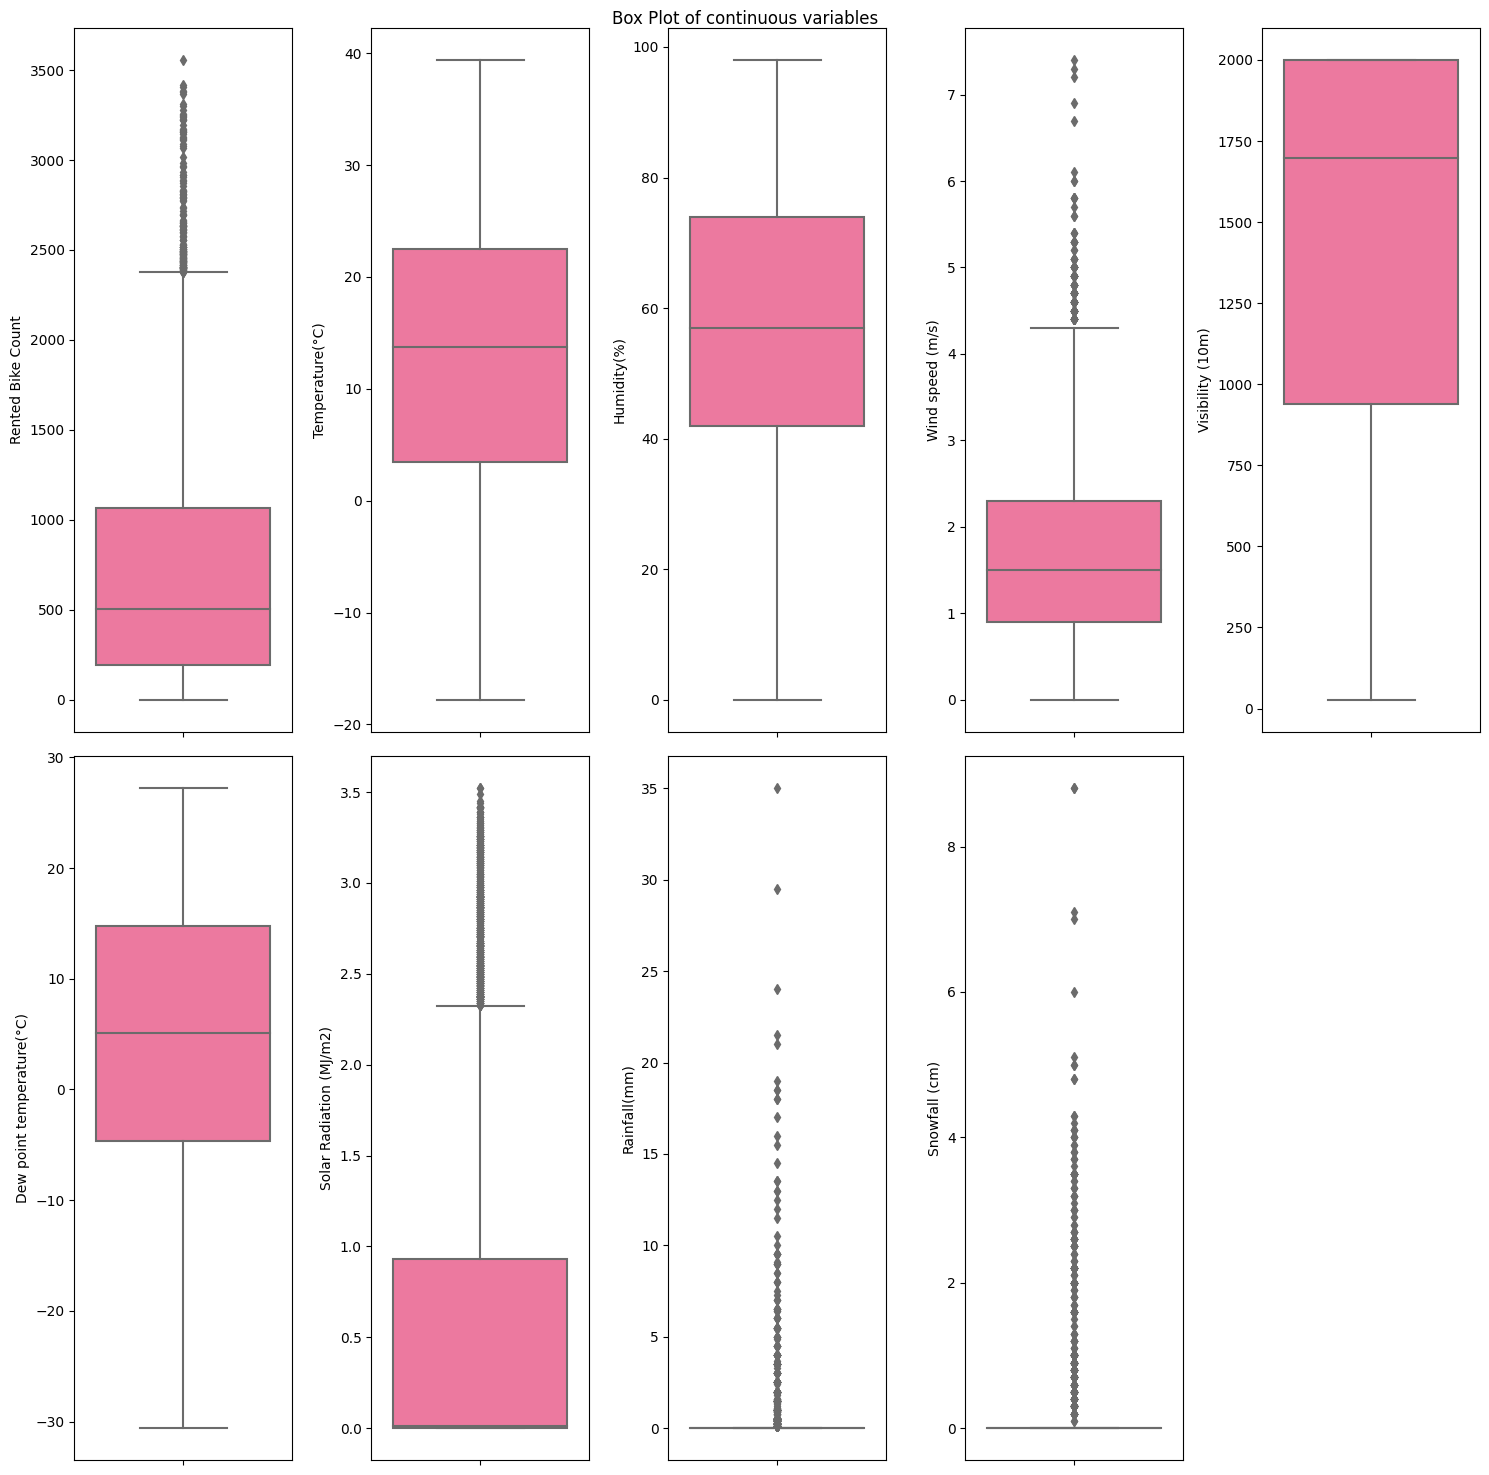

In [ ]:
# kiểm tra outlier bằng box plot

##định dạng size box plot
plt.figure(figsize=(15, 15))
##vẽ boxplot
for i, col in enumerate(numeric_data):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(2,5, i+1)
    sns.boxplot(data=bike_sharing, y=col, ax=ax,color='#ff6699')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()
plt.show()

**Sau khi vẽ sơ đồ boxplot, nhóm kết luận cần phải loại bỏ outliers ở các trường thông tin bao gồm:**
*   Rented bike count
*   Wind speed
*   Solar radiation
*   Rainfall
*   Snowfall


**Nhóm quyết định xử lý outliners sử dụng Z score**

- Z Score giúp chúng ta đánh giá và so sánh dữ liệu theo mức trung bình của tổng thể, hiểu hơn về tần suất xuất hiện và độ lệch thông qua tính toán xác suất.

- Giá trị Z Score càng lớn hoặc nhỏ hơn mức trung bình, thì quan sát đó càng được coi là không bình thường.

- Để xác định một giá trị Z Score được coi là không bình thường, chúng ta thông thường sử dụng một ngưỡng xác định. Thông thường, ngưỡng này được đặt tại ±2, lấy từ phân phối chuẩn (normal distribution). Do đó, nếu giá trị Z Score lớn hơn 2 hoặc nhỏ hơn -2, chúng ta có thể nói rằng quan sát đó không bình thường.

Ở bài này, nhóm quyết định lựa chọn ngưỡng xác định là 3

In [ ]:
# Tính z-scores
numeric_cols = ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
zscores = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

# Remove rows with z-scores greater than 3
final_df = df[(zscores.abs() < 3).all(axis=1)]

In [ ]:
#kiểm tra lại
final_df.describe()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8285.000000,8285.000000,8285.000000,8285.000000,8285.000000,8285.000000,8285.00000,8285.000000,8285.000000
mean,700.016295,12.922450,57.955100,1.693627,1447.927821,4.082643,0.54966,0.055377,0.021002
std,617.622627,11.886319,19.973755,0.994914,601.092110,13.094716,0.83956,0.316577,0.126625
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.00000,0.000000,0.000000
25%,202.000000,3.800000,43.000000,0.900000,960.000000,-4.600000,0.00000,0.000000,0.000000
50%,520.000000,13.700000,57.000000,1.500000,1707.000000,5.100000,0.00000,0.000000,0.000000
75%,1058.000000,22.400000,73.000000,2.300000,2000.000000,14.800000,0.91000,0.000000,0.000000
max,2637.000000,39.400000,98.000000,4.800000,2000.000000,27.200000,3.17000,3.500000,1.300000


Nhóm nhận thấy outliners đã được xử lý ổn thỏa (mean và 50% không chênh lệch quá lớn)

## Xử lý dữ liệu (EDA)

### Categorical data

**Tính Monthly Rental Count (from Dec 2017 to Nov 2018)**

In [ ]:
# Lấy categorical data đã phân loại ở trên
categorical_data

,Date,Hour,Seasons,Holiday,Functioning Day
0,01/12/2017,0,Winter,No Holiday,Yes
1,01/12/2017,1,Winter,No Holiday,Yes
2,01/12/2017,2,Winter,No Holiday,Yes
3,01/12/2017,3,Winter,No Holiday,Yes
4,01/12/2017,4,Winter,No Holiday,Yes
...,...,...,...,...,...
8755,30/11/2018,19,Autumn,No Holiday,Yes
8756,30/11/2018,20,Autumn,No Holiday,Yes
8757,30/11/2018,21,Autumn,No Holiday,Yes
8758,30/11/2018,22,Autumn,No Holiday,Yes


In [ ]:
# Chuyển đổi kiểu data Date
categorical_data['Date'] = pd.to_datetime(categorical_data['Date'], format='%d/%m/%Y')

# Merge cột "Rented Bike Count" vào bảng categorical_data
merged_categorical = pd.merge(categorical_data, bike_sharing[['Date', 'Rented Bike Count']], on='Date', how='left')

# Thêm cột 'Month_Year' (bằng cách kết hợp thành phần tháng và năm)
merged_categorical['Month_Year'] = merged_categorical['Date'].dt.strftime('(%Y, %m)')

merged_categorical

,Date,Hour,Seasons,Holiday,Functioning Day,Rented Bike Count,Month_Year
0,2017-12-01,0,Winter,No Holiday,Yes,254,"(2017, 12)"
1,2017-12-01,0,Winter,No Holiday,Yes,204,"(2017, 12)"
2,2017-12-01,0,Winter,No Holiday,Yes,173,"(2017, 12)"
3,2017-12-01,0,Winter,No Holiday,Yes,107,"(2017, 12)"
4,2017-12-01,0,Winter,No Holiday,Yes,78,"(2017, 12)"
...,...,...,...,...,...,...,...
210235,2018-11-30,23,Autumn,No Holiday,Yes,1003,"(2018, 11)"
210236,2018-11-30,23,Autumn,No Holiday,Yes,764,"(2018, 11)"
210237,2018-11-30,23,Autumn,No Holiday,Yes,694,"(2018, 11)"
210238,2018-11-30,23,Autumn,No Holiday,Yes,712,"(2018, 11)"


In [ ]:
# Nhóm data theo (Tháng_Năm), tính monthly rental, trả về dạng dataframe, sắp xếp theo thứ tự tăng dần (theo thời gian)
monthly_counts = merged_categorical.groupby('Month_Year')['Rented Bike Count'].sum().reset_index().sort_values('Month_Year')
monthly_counts

,Month_Year,Rented Bike Count
0,"(2017, 12)",4447920
1,"(2018, 01)",3600144
2,"(2018, 02)",3643992
3,"(2018, 03)",9134256
4,"(2018, 04)",12581448
5,"(2018, 05)",16970112
6,"(2018, 06)",21525288
7,"(2018, 07)",17627040
8,"(2018, 08)",15645288
9,"(2018, 09)",16166688


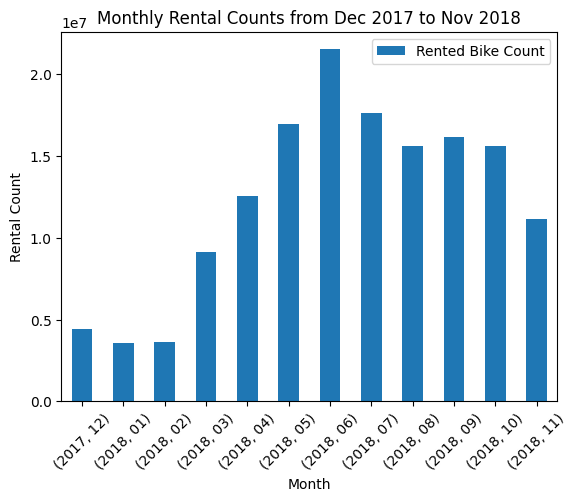

In [ ]:
# Plot the bar graph
monthly_counts.plot(x='Month_Year',
                    y='Rented Bike Count',
                    kind='bar',)


plt.title('Monthly Rental Counts from Dec 2017 to Nov 2018')
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.xticks(rotation=45)

plt.show()

**Nhận xét Monthly Rental Count:**
- Lượng đặt xe cao nhất vào Tháng 6, thấp nhất vào Tháng 1.
- Lượng đặt xe tăng dần từ Tháng 1 đến Tháng 6.
- Các tháng mùa hè (Tháng 6, 7, 8) có lượng đặt xe cao nhất -> Nhu cầu cao vào giai đoạn này.
- Lượng đặt xe bắt đầu giảm từ Tháng 7 đến cuối năm. Có sự giảm mạnh ở Tháng 11 so với những tháng khác.

**Kết luận: Có xu hướng theo mùa, với số lượng xe được thuê cao hơn và những tháng có nhiệt độ trung bình trở lên và thấp hơn với những tháng có nhiệt độ thấp**


In [ ]:
#Phân tích theo mùa
import pandas as pd
season_variable=pd.crosstab(index=df['Seasons'],columns='total observations')
season_variable

col_0,total observations
Seasons,
Autumn,2184
Spring,2208
Summer,2208
Winter,2160


từ bảng trên nhóm kết luận số lượng dữ liệu của 4 mùa được thu thập ngang nhau.

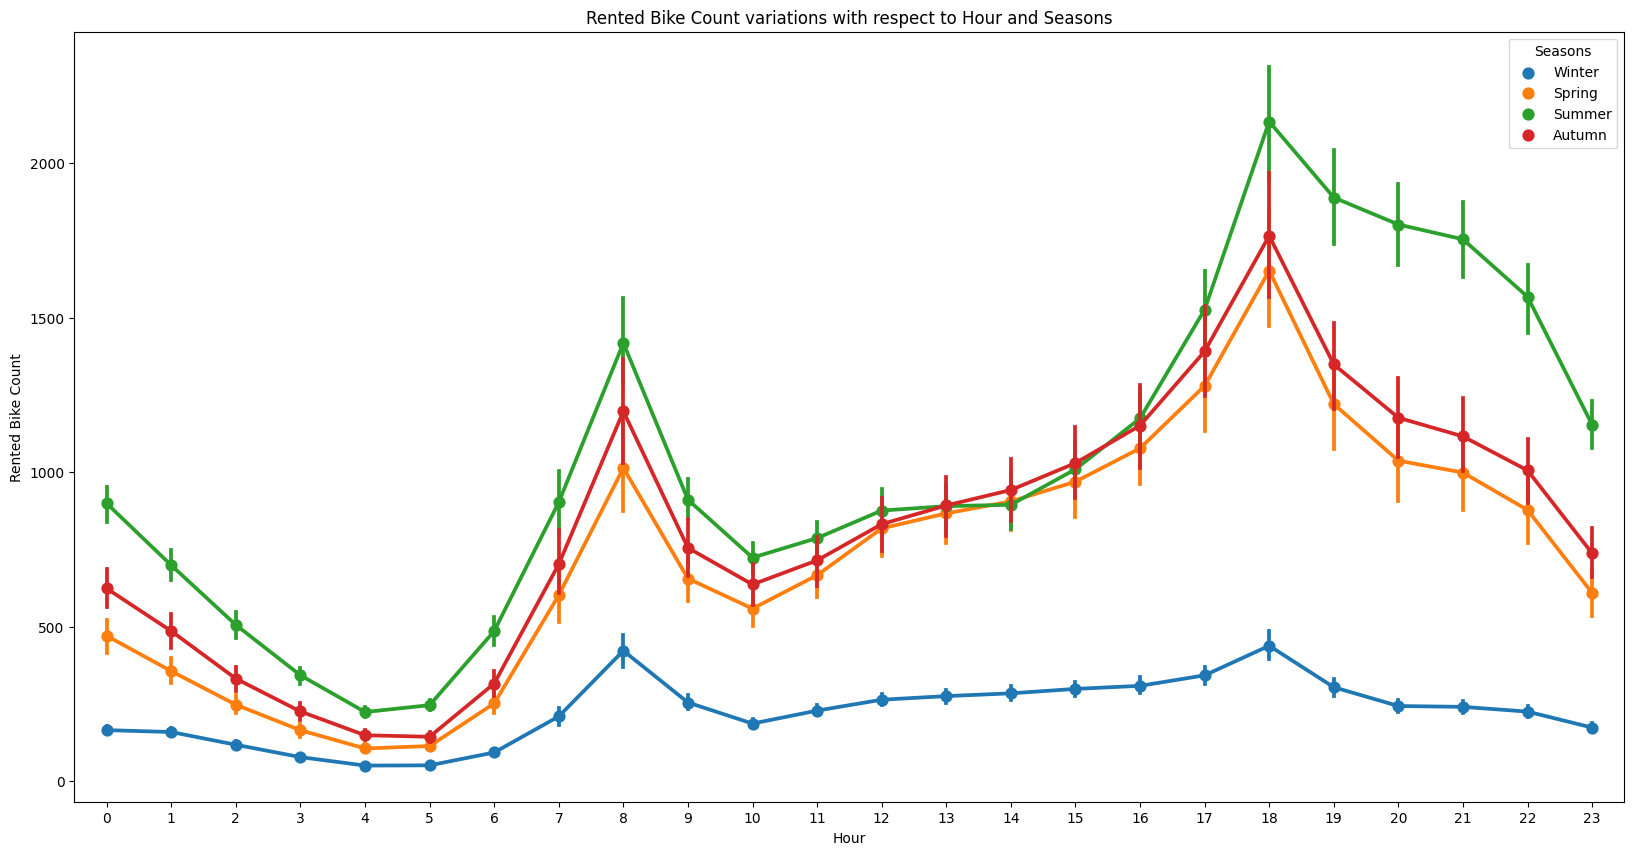

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_pointplot(categorical_features):
  plt.figure(figsize=(20, 10))
  sns.pointplot(x='Hour', y='Rented Bike Count', hue=categorical_features, data=df)
  plt.title(f"Rented Bike Count variations with respect to Hour and {categorical_features}")
  plt.xlabel("Hour")
  plt.ylabel("Rented Bike Count")
  plt.show()


draw_pointplot("Seasons")

- Nhìn chung, ta có thể số lượng xe được thuê vào mùa hè cao nhất, trong khi nhu cầu thuê xe vào mùa đông là ít nhất.
- Ngoài ra, 8h và 18h là 2 khung giờ cao điểm với số lượng xe được thuê cao nhất trong cả 4 mùa.

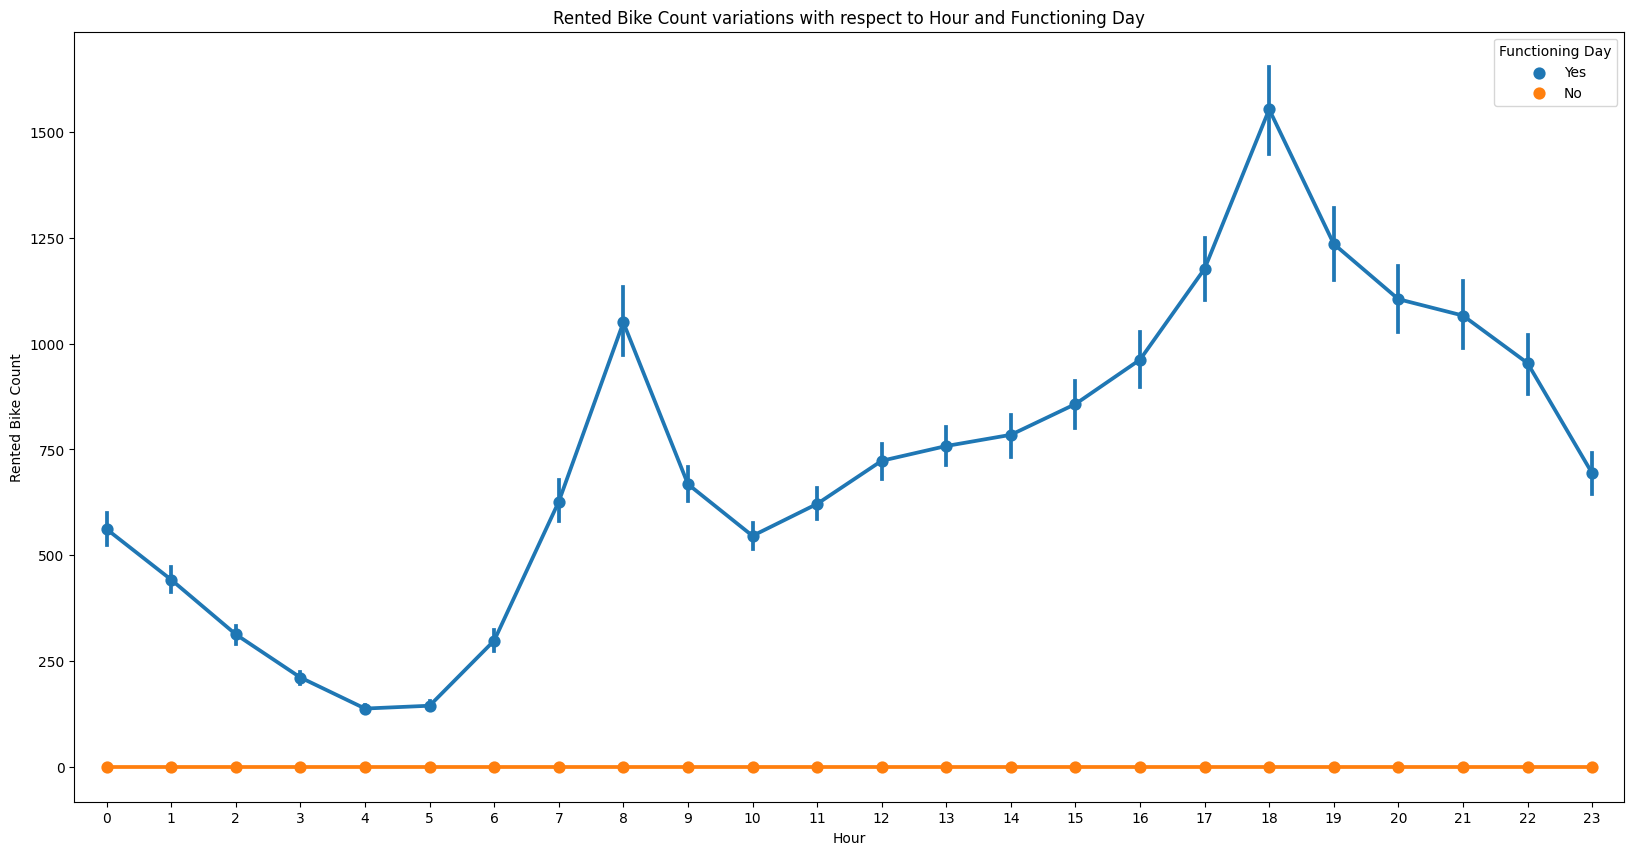

In [ ]:
draw_pointplot("Functioning Day")

Có thể dễ dàng nhận thấy không xe nào được thuê nếu ngày đó không phải là Functioning Day

In [ ]:
import pandas as pd
holiday_variable=pd.crosstab(index=df['Holiday'],columns='total observations')
holiday_variable

col_0,total observations
Holiday,
Holiday,432
No Holiday,8328


Vì có sự chênh lệch về số lượng dữ liệu giữa số ngày thường và ngày nghỉ lễ, ta sẽ tính bình quân lượng xe đạp thuê trong 2 loại ngày này để so sánh.

In [ ]:
grouping_holiday=df.copy()
holiday = pd.DataFrame(grouping_holiday.groupby('Holiday')['Rented Bike Count'].mean().sort_values(ascending=False))
holiday.style.background_gradient(cmap=sns.light_palette('#7DA3A1',as_cmap=True))

,Rented Bike Count
Holiday,
No Holiday,715.228026
Holiday,499.756944


Text(0.5, 1.0, 'Rented Bike Count By Holiday')

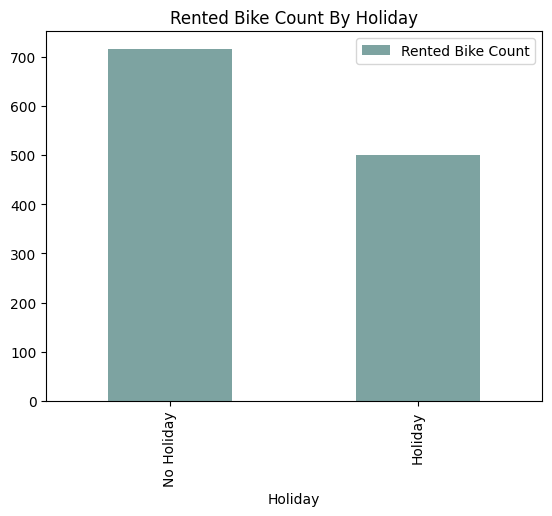

In [ ]:
holiday.plot.bar(color = ['#7DA3A1'])
plt.title('Rented Bike Count By Holiday')

In [ ]:
import pandas as pd
holiday_variable=pd.crosstab(index=df['Holiday'],columns='total observations')
holiday_variable

col_0,total observations
Holiday,
Holiday,432
No Holiday,8328


Có thể thấy tổng lượng xe đạp được thuê vào ngày nghỉ lễ ít hơn vào ngày thường.

### Numerical data

Nhóm tìm hiểu correlation (tương quan) giữa các biến và sử dụng các biểu đồ để khai phá dữ liệu (EDA)

In [ ]:
#tìm corr với rented bike count
numeric_data.corr()['Rented Bike Count'].to_frame().style.background_gradient(cmap='RdPu').format(precision=2)

,Rented Bike Count
Rented Bike Count,1.00
Temperature(°C),0.54
Humidity(%),-0.20
Wind speed (m/s),0.12
Visibility (10m),0.20
Dew point temperature(°C),0.38
Solar Radiation (MJ/m2),0.26
Rainfall(mm),-0.12
Snowfall (cm),-0.14


Các biến có chỉ số Correlation không gần 0 nên các biến đều quan trọng

NameError: ignored

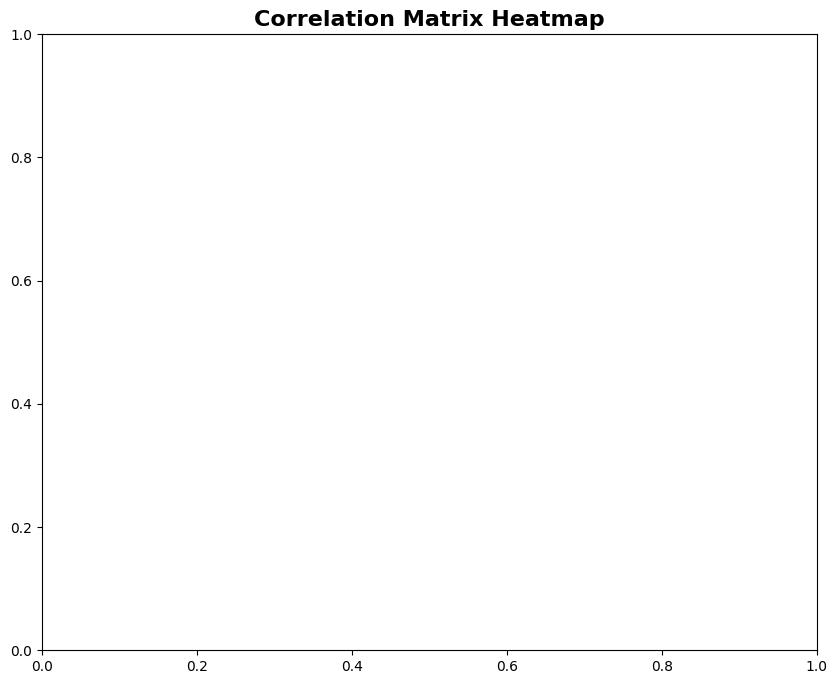

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix Heatmap', fontweight = 'heavy', fontsize = 16)
sns.heatmap(correlation, annot= True,
            cmap= 'Reds',
            vmin= -1, vmax= 1,
            linecolor = 'white', linewidths = 0.5,
            fmt = '.2f')
plt.show()


*Từ Correlation Matrix Heatmap, ta rút được các kết luận:*
1. Những biến tỷ lệ thuận với lượng xe đạp được thuê:
*   Dew point temperature
*   Solar radiation
*   Temperature
2. Những biến tỷ lệ nghịch với lượng xe đạp được thuê:
*   Humidity
*   Rainfall


*Ta tiếp tục lọc các biến tương quan*
Nếu một biến trong đo lường có hệ số tương quan >=0.3 thì biến đó đạt yêu cầu (Nunnally & Bernstein, 1994).

In [ ]:
#heatmap correlation đã lọc
plt.figure(figsize=(8,6))
sns.heatmap((correlation[(correlation>=0.3) |(correlation <=-0.3)]), mask=np.triu(correlation),annot=True,center = 0, cmap="Reds")
plt.suptitle('Heatmap correlation')
plt.show()

Biến "Temperature" có tương quan tuyến tính chặt chẽ tới số lượng xe đạp được thuê (0.54)

Các biến còn lại có correlation nhỏ (ngoại trừ Dew point temperature - Temperature/Humidity) => Ít ảnh hưởng với nhau theo mối quan hệ tuyến tính



In [ ]:
bike_sharing.copy().groupby('Temperature(°C)').mean()['Rented Bike Count'].plot.line(color='#3A1175')
plt.title('Rented Bike Count of Temperature')

In [ ]:
#count từng biến
plt.figure(figsize=(12, 12))
for i, col in enumerate(bike_sharing.copy().select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=bike_sharing, x=col, ax=ax,color='#0047AB',kde=True)
plt.suptitle('Data distribution of variables')
plt.tight_layout()

Sau khi phân tích, nhóm thấy rằng:
- Nhiệt độ của khu vực dao động từ -20 đến 40 độ C, trung bình 20 độ
- Độ ẩm trung bình từ 45-70%
- Tốc độ gió trung bình khoảng 1,5m/s.
- Bức xạ mặt trời rất thấp, chỉ khoảng 0.01 => Không có nắng mạnh
- Rainfall, Snowfall gần như bằng 0

=> Khu vực khí hậu ôn đới mát mẻ, ít mưa/có tuyết rơi.

In [ ]:
bike_sharing['Day Name'] = bike_sharing['Date'].dt.day_name()
plt.figure(figsize = (16,8))
sns.lineplot(x = 'Hour', y= 'Rented Bike Count',hue ='Day Name' , data = bike_sharing)
plt.title("Average Bike Sharing Demand on Different days of the Week")
a = plt.xticks(ticks = np.arange(0,24,1))

Buổi sáng thứ Hai sẽ có lượng xe được thuê cao nhất và buổi tối sẽ có lượng xe cao nhất rơi vào thứ sáu. Nhu cầu thuê xe vào lúc trưa muộn và chiều cao nhất vào thứ Bảy và Chủ Nhật.

In [ ]:
#biểu đồ theo thời gian từng biến
plt.figure(figsize=(18, 15))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(5,2, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax, palette = 'mako')
plt.suptitle('Data distribution of variables')
plt.tight_layout()

- Lượng xe thuê sẽ tăng từ 5h sáng và giảm từ sau 8h.
- Sau 10h lượng xe sẽ tăng và đạt đỉnh vào 18h sau đó bắt đầu hạ dần



Lượng thuê xe đạt đỉnh điểm vào 18h trong ngày. Vào 18h:
- nhiệt độ bắt đầu giảm
- độ ẩm thấp
- trời có gió nhưng không phải thời điểm gió mạnh trong ngày
- bức xạ mặt trời giảm

=> thời tiết dễ chịu nên số lượng thuê xe cao nhất trong ngày

## Modelling

### Import

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import StackingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
#khai báo dictionary phục vụ bước 5.Lựa chọn mô hình
model_comparison = {}

### Data normalization

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(final_df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((final_df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(final_df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

Đối với square root, data đã được chuẩn hóa. Vì vậy, nhóm sử dụng Square root

In [ ]:
final_df.head()

Để dự đoán chuẩn hơn, nhóm sử dụng one hot encoding

*One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.*

**Tạm dịch:**
One hot encoding là quá trình trong đó kiểu biến định tính được chuyển về 1 dạng có thể cung cấp cho thuật toán máy học để có thể dự đoán tốt hơn

### **Phân loại biến**






Sau khi xử lý dữ liệu EDA, nhóm đã rút được ra một phát hiện: hai biến 'Temperature' và 'Dew point Temperature' có tương quan dương - tức nếu bỏ một trong hai biến đều không ảnh hưởng kết quả. Vì vậy nhóm quyết định bỏ biến 'Dew point temperature'



In [ ]:
X = numeric_data.drop(columns=['Rented Bike Count','Dew point temperature(°C)'])
y = np.sqrt(numeric_data['Rented Bike Count'])

In [ ]:
# Train test
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25,random_state=0)

### Regularization

This scenario does not necessarily indicate overfitting. Overfitting typically occurs when the model performs **significantly** better on the training set compared to the test set. In overfitting, the model effectively "memorizes" the training data and fails to generalize well to new, unseen data.

In this case, the relatively similar scores (0.42 and 0.40) suggest that the model's performance is consistent between the training and test sets.

### Linear Regression

"Hồi quy tuyến tính" là một phương pháp thống kê để hồi quy dữ liệu với biến phụ thuộc có giá trị liên tục trong khi các biến độc lập có thể có một trong hai giá trị liên tục hoặc là giá trị phân loại. Nói cách khác "Hồi quy tuyến tính" là một phương pháp để dự đoán biến phụ thuộc (Y) dựa trên giá trị của biến độc lập (X). Nó có thể được sử dụng cho các trường hợp chúng ta muốn dự đoán một số lượng liên tục. Ví dụ, dự đoán giao thông ở một cửa hàng bán lẻ, dự đoán thời gian người dùng dừng lại một trang nào đó hoặc số trang đã truy cập vào một website nào đó v.v

In [ ]:
# Tạo một Linear Regression Object
lr_model = LinearRegression()

# Huấn luyện model với dữ liệu đã được xác định
lr_model.fit(X_train, y_train)

# Sử dụng hàm predict để dự đoán
lr_ypred = lr_model.predict(X_test)

In [ ]:
# Calculate performance metrics
r2 = r2_score(y_test, lr_ypred)
mse = mean_squared_error(y_test, lr_ypred)
rmse = math.sqrt(mse)

print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

#lưu kết quả
model_comparison['Linear Regression']=[rmse, r2]

In [ ]:
lr_model.get_params().keys()

# Định nghĩa grid search với các giá trị siêu tham số cần tìm
param_grid = {'fit_intercept': [True, False]}

# Thực hiện grid search với cross-validation trên tập train
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# In siêu tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# In điểm RMSE tốt nhất
print("Best RMSE Score:", abs(grid_search.best_score_.round(4)))

In [ ]:
# So sánh Training score và Test score để kiểm tra model có overfitting không
print(f"Linear Regression-Training set score: {lr_model.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr_model.score(X_test, y_test):.2f}")

### Polynomial

Hồi quy đa thức là một dạng hồi quy tuyến tính trong đó mối quan hệ giữa biến độc lập x và biến phụ thuộc y được mô hình hóa dưới dạng đa thức bậc n. Hồi quy đa thức phù hợp với mối quan hệ phi tuyến giữa giá trị của x và giá trị trung bình có điều kiện tương ứng của y, được ký hiệu là E (y | x)



In [ ]:
# Khởi tạo mô hình Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train, y_train)
X_val_poly = poly_features.transform(X_test)

# Phù hợp với mô hình Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

In [ ]:
# Thực hiện grid search với cross-validation trên tập train
grid_search = GridSearchCV(poly_model, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

# In siêu tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# In điểm RMSE tốt nhất
print("Best RMSE Score:", abs(grid_search.best_score_.round(4)))

In [ ]:
# Tạo mô hình Linear Regression với siêu tham số tốt nhất
lr_model_1 = LinearRegression(fit_intercept=False)

# Fit mô hình vào tập huấn luyện
lr_model_1.fit(X_train_poly, y_train)

In [ ]:
# Đánh giá trên tập validation
y_val_pred = lr_model_1.predict(X_val_poly)
rmse = round(np.sqrt(mean_squared_error(y_test, y_val_pred)), 4)
r2 = r2_score(y_test,y_val_pred)
print("Root Mean Squared Error on validation set:", rmse)
print('RMSE on validation set:', r2)
#lưu kết quả
model_comparison['Polynomial Regression']=[rmse, r2]

### Decission Tree

Mô hình cây quyết định là một mô hình được sử dụng khá phổ biến và hiệu quả trong cả hai lớp bài toán phân loại và dự báo của học có giám sát. Khác với những thuật toán khác trong học có giám sát, mô hình cây quyết định không tồn tại phương trình dự báo. Mọi việc chúng ta cần thực hiện đó là tìm ra một cây quyết định dự báo tốt trên tập huấn luyện và sử dụng cây quyết định này dự báo trên tập kiểm tra.

In [ ]:
# khởi tạo mô hình decision tree regression
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

y_pred2 = dtr.predict(X_test)
print('rmse default', round(math.sqrt(mean_squared_error(y_test, y_pred2)),4))

In [ ]:
dtr.get_params().keys()

*   ccp_alpha: A non-negative float that controls the complexity of the decision trees in the forest. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
*   criterion: A string that specifies the splitting criterion to use. The possible values are "gini" and "entropy".
*   max_depth: An integer that specifies the maximum depth of the decision trees in
*  max_features: An integer or float that specifies the maximum number of features to consider when splitting a node in a decision tree. A higher value will lead to more complex trees, while a lower value will lead to simpler trees.
*  max_leaf_nodes: An integer that specifies the maximum number of leaf nodes in the decision trees in the forest. A higher value will lead to more complex trees, while a lower value will lead to simpler trees.
*   min_impurity_decrease: A non-negative float that specifies the minimum decrease in impurity required to split a node in a decision tree. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
*   min_samples_leaf: An integer that specifies the minimum number of samples required in a leaf node in a decision tree. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
*   min_samples_split: An integer that specifies the minimum number of samples required to split a node in a decision tree. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
*   min_weight_fraction_leaf: A non-negative float that specifies the minimum fraction of the sum of the weights of the samples in a leaf node. A higher value will lead to simpler trees, while a lower value will lead to more complex trees.
*  random_state: An integer that specifies the random seed to use. This can be used to ensure that the results are reproducible.
*   splitter: This is how the decision tree searches the features for a split.The default value is set to “best”. That is, for each node, the algorithm considers all the features and chooses the best split. If you decide to set the splitter parameter to “random,” then a random subset of features will be considered.

In [ ]:
# tạo 1 dict với key là tên hyperparam, value là các giá trị thử
params = {"splitter":["best","random"],
          "max_depth" : range(1,15),
          'min_samples_split': range(2, 21),
          "min_samples_leaf":range(1,20),
          "max_features":["auto","log2","sqrt",None],
          'min_weight_fraction_leaf': np.arange(0, 0.6, 0.1),
          "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
          'random_state': [0],
          'min_impurity_decrease': np.arange(0,0.1, 0.01)}
# tạo grid search
random_dtr = RandomizedSearchCV(dtr, params,n_iter = 60, scoring='neg_root_mean_squared_error', cv=5, verbose=1)
# fit vào model
random_dtr.fit(X_train, y_train)

In [ ]:
# In hyperparam tốt nhất
print("Best Parameters:", random_dtr.best_params_)

# In điểm RMSE tốt nhất
print("Best RMSE Score:", abs(random_dtr.best_score_.round(4)))

In [ ]:
# Train lại với tập train và đánh giá trên tập validation
tuned_dtr = DecisionTreeRegressor(splitter= 'best', random_state = 42, min_weight_fraction_leaf = 0.0, min_samples_split = 17, min_samples_leaf = 10, min_impurity_decrease = 0.08, max_leaf_nodes = 90, max_features = 'log2', max_depth = 13)
tuned_dtr.fit(X_train, y_train)
tuned_y_pred = tuned_dtr.predict(X_test)

rmse = round(math.sqrt(mean_squared_error(y_test, tuned_y_pred)),4)
r2 = r2_score(y_test,tuned_y_pred)

print('Root Mean Squared Error on validation set:', rmse)
print('RMSE on validation set:', r2)

model_comparison['Decession Tree Regression']=[rmse, r2]

### RandomForest Regression

Random forest là một phương pháp thống kê mô hình hóa bằng máy (machine learning statistic) dùng để phục vụ các mục đích phân loại, tính hồi quy và các nhiệm vụ khác bằng cách xây dựng nhiều cây quyết định (Decision tree)

In [ ]:
# Initializing the Random Forest Regression model with 10 decision trees
rfr_model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
rfr_model.fit(X_train, y_train)

# Dùng hàm predict để dự đoán
rfr_ypred = rfr_model.predict(X_test)

# Evaluating the model
r2 = r2_score(y_test, rfr_ypred)
mse = mean_squared_error(y_test, rfr_ypred)
rmse = math.sqrt(mse)

print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

model_comparison['RandomForest Regression']=[rmse, r2]

### Bagging Regressor

- Bagging: Xây dựng một lượng lớn các model (thường là cùng loại) trên những subsamples khác nhau từ tập training dataset (random sample trong 1 dataset để tạo 1 dataset mới). Những model này sẽ được train độc lập và song song với nhau nhưng đầu ra của chúng sẽ được trung bình cộng để cho ra kết quả cuối cùng.

- Như chúng ta đã biết thì Random forests là một tổ hợp của nhiều Decision Tree. Với kỹ thuật kết hợp (Ensemble learning). Nhóm lấy Random Forest Regressor (đã được tunning) ở trên làm base model cho thuật toán kết hợp n model. Như vậy Bagging Regressor ở đây là một tổ hợp của nhiều Random Forest Regressor

In [ ]:
# Khởi tạo mô hình Polynomial Regression
bagging = BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0)

# Fitting mô hình với dữ liệu
bagging.fit(X_train, y_train)

# Dự đoán bằng hàm predict
y_pre = bagging.predict(X_test)

# Đánh giá mô hình
r2 = r2_score(y_test, y_pre)
mse = mean_squared_error(y_test, y_pre)
rmse = math.sqrt(mean_squared_error(y_test,y_pre))

print(f"Bagging R-Square : {r2_score(y_test,y_pre)*100:.2f}%")
print(f"Bagging MSE : {mean_squared_error(y_test,y_pre):.2f}%")
print(f"Bagging RMSE : {math.sqrt(mean_squared_error(y_test,y_pre)):.2f}")

accuracies = cross_val_score(estimator = bagging, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))

model_comparison['Bagging Regressor']=[rmse, r2]

### Stacking

- Stacking hay tên đầy đủ là Stacked Generalization là một thuật toán học máy thuộc Ensemble Learning. Tương tự như Bagging và Boosting, Stacking cũng kết hợp các dự đoán từ nhiều mô hình học máy trên cùng một tập dữ liệu.

- Khác với Bagging, Stacking sử dụng nhiều mô hình học máy khác nhau chứ không chỉ là Decision Tree hay RandomForest.

- Ở đây Stacking Regressor nhóm 5 sử dụng là tổ hợp của tất cả các mô hình (đã được tunning) phía trên là Linear Regression, Decision Tree Regression, Polynomial Regression, Random Forest Regression và Bagging Regression.

In [ ]:
combine = [('linear regression',lr_model ),
            ('decision Tree',tuned_dtr),
            ('random forest',rfr_model),
            ('bagging',bagging)]

In [ ]:
str=StackingRegressor(estimators = combine)
str.fit(X_train, y_train)
y_pred5 = str.predict(X_test)

rmse = round(math.sqrt(mean_squared_error(y_test, y_pred5)),4)
r2 = r2_score(y_test,y_pred5)

print('rmse default', rmse)
print('r2 on validation set', r2)

model_comparison['Stacking Regressor 1']=[rmse, r2]

In [ ]:
combine2 = [('linear regression',lr_model),
            ('polynomial regression',poly_model),
            ('decision Tree',tuned_dtr),
            ('random forest',rfr_model),
            ('bagging',bagging)]

In [ ]:
str2=StackingRegressor(estimators = combine2)
str2.fit(X_train, y_train)
y_pred6 = str2.predict(X_test)

rmse = round(math.sqrt(mean_squared_error(y_test, y_pred6)),4)
r2 = r2_score(y_test,y_pred6)

print('rmse default', rmse)
print('r2 on validation set', r2)

model_comparison['Stacking Regressor 2']=[rmse, r2]

### Model Comparison

In [ ]:
#Tạo Dataframe là bảng các chỉ số RMSE của tât cả các mô hình sau khi đã phân tích:
model_com_df=pd.DataFrame(model_comparison).T
model_com_df.columns=['RMSE', 'R2']
model_com_df= model_com_df.sort_values(by='RMSE',ascending=False)
model_com_df.style.background_gradient(cmap='Greens_r')

- Theo phân tích, Stacking Regressor có chỉ số RMSE thấp nhất và R2 cao nhất. Vì vậy, nhóm sẽ lựa chọn mô hình Stacking Regression.

## Conclusion

Nhóm quyết định phát triển model bằng những cách sau:
- Giới hạn phạm vi giá trị dựa vào biến "giờ"
- Hyperparameter tunning



###Giới hạn phạm vi giá trị dữ liệu

In [ ]:
# Ý tưởng cải thiện mô hình
# - Giới hạn phạm vi giá trị dựa trên giờ
hour_min = df.groupby('Hour')['Rented Bike Count'].min().reset_index()
hour_max = df.groupby('Hour')['Rented Bike Count'].max().reset_index()
hour_min['Hour'] -= 1
hour_max['Hour'] -= 1

plt.figure(figsize=(9,6))
sns.barplot(data=df, x='Hour', y='Rented Bike Count')
sns.lineplot(data=hour_min, x='Hour', y='Rented Bike Count')
sns.lineplot(data=hour_max, x='Hour', y='Rented Bike Count')
plt.show()


GROUP BY sẽ gom nhóm dữ liệu và chỉ trả về một record cho một nhóm duy nhất, vì vậy nó giúp giảm bớt dữ liệu không cần thiết trong kết quả trả về. Bằng cách giới hạn phạm vi có thể giảm thiểu sai lệch trong dự đoạn cũng như overestimation (đánh giá quá cao).

###Hyperparameter tuning
Điều chỉnh siêu tham số (hyperparameter tuning) là chọn một tập hợp các siêu tham số (hyperparameter) tối ưu cho một thuật toán học (learning algorithm). Một siêu tham số có giá trị được thiết lập trước khi quá trình học bắt đầu. Chìa khóa của các thuật toán học máy (machine learning algorithm) là điều chỉnh siêu tham số.

In [ ]:
# Hyperparameter tuning
# - Use a grid search to find the best combination of hyperparameters for the Stacking Regressor.
stacking = StackingRegressor(
    estimators=[
        ('decision_tree', DecisionTreeRegressor(random_state=42)),
        ('random_forest', RandomForestRegressor(random_state=0))
    ]
)
stacking.fit(X_train,y_train)
stacking.get_params().keys()

In [ ]:
params = {
    'decision_tree__max_depth': [7, 8],
    'random_forest__n_estimators': [300, 500],
    'random_forest__min_samples_split': [3, 5],
    'random_forest__min_samples_leaf': [3, 5]
}

grid_search = GridSearchCV(stacking, params, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


# - Some hyperparameters to consider include the number of base models, the learning rate, and the number of epochs.
# - Use cross-validation to evaluate the performance of the Stacking Regressor with different hyperparameter combinations.

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
print("Training columns:", X_train.columns)
print("Testing columns:", X_test.columns)


In [ ]:
# Get the names of the features used to train the model
train_features = X_train.columns.tolist()

# Remove extra features from X_test
X_test = X_test[train_features]

# For any missing features, add them to X_test and fill with 0
for feature in train_features:
    if feature not in X_test.columns:
        X_test[feature] = 0


In [ ]:
predictions = grid_search.predict(X_test)

In [ ]:
print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test,
                                                    grid_search.predict(X_test)))) )

In [ ]:
df1=df.drop(['Functioning Day'], axis = 1)
le_df= df1.apply(LabelEncoder().fit_transform)

X=le_df.drop('Rented Bike Count',axis=1)
y=le_df['Rented Bike Count']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

# Standardize the dataset

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
st_params = {'decision_tree__max_depth': 7,
 'random_forest__min_samples_leaf': 5,
 'random_forest__min_samples_split': 3,
 'random_forest__n_estimators': 500
             }

In [ ]:
# Define your DecisionTreeRegressor with the desired max_depth
decision_tree = DecisionTreeRegressor(max_depth=7)

# Define your RandomForestRegressor with the desired parameters
random_forest = RandomForestRegressor(min_samples_leaf=5, min_samples_split=3, n_estimators=500)

# Create a list of estimators
estimators = [('decision_tree', decision_tree), ('random_forest', random_forest)]

stacking = StackingRegressor(estimators=estimators)

In [ ]:
# Fit the model
stacking.fit(X_train_std, y_train)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % stacking.score(X_test_std, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test,stacking.predict(X_test_std))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Root Mean Squared Error is {:.4f} '.format(np.sqrt(mean_squared_error(y_test, stacking.predict(X_test_std)))))


In [ ]:
# Feature selection
# - Use a feature selection algorithm to remove irrelevant or redundant features from the dataset.
X = df[['Hour', 'Temperature(°C)', 'Wind speed (m/s)']]
y = df['Rented Bike Count']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
stacking.fit(X_train, y_train)
pred_three_col = stacking.predict(X_val)
# - This can help to improve the performance of the Stacking Regressor by reducing the amount of noise in the data.
# - Some feature selection algorithms to consider include the L1 regularization, L2 regularization, and the Lasso.

In [ ]:
graph['pred_3col'] = pred_three_col
plt.figure(figsize=(9,6))
sns.scatterplot(data=graph, x='pred_3col', y='Rented Bike Count')
sns.scatterplot(data=graph, x=stacking.predict(X_val), y='Rented Bike Count', color='limegreen')
sns.lineplot(x=[0,3000], y=[0,3000], color='red', linestyle='--')
plt.show()

In [ ]:
mse_3col = mean_squared_error(y_val, pred_three_col)
r2_3col = mean_absolute_error(y_val, pred_three_col)

In [ ]:
print(f'The stacking mse was {round(rmse, 1)}')
print(f'using only three column it is {round(mse_3col, 1)}')
print('-----------------------------------')
print(f'The stacking r2 score was {round(r2, 1)}')
print(f'using only three column it is {round(r2_3col, 1)}')

In [ ]:
def filter_phrases(text, filter_phrases):
    """
    Filter out phrases from the text that include any of the specified filter phrases.
    """
    for phrase in filter_phrases:
        text = text.replace(phrase, '')

    return text

def main():
    # Get input text from the user
    input_text = input("Enter the text: ")

    # Define filter phrases
    filter_phrases_list = ["cốc", "coc", "cô", "cờ rôm", "corom", "sex"]

    # Filter the input text
    output_text = filter_phrases(input_text, filter_phrases_list)

    # Display the filtered text
    print("Filtered Text:")
    print(output_text)

if __name__ == "__main__":
    main()